In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json


In [2]:
from pymongo import MongoClient
client = MongoClient('mongodb://localhost:27017/')
mydb = client['customer_data']
collect = mydb['general_data']


In [3]:
# Lấy dữ liệu từ collection
data = list(collect.find())

# Chuyển đổi thành DataFrame
df = pd.DataFrame(data)
df


,_id,OrderID,ProductID,ProductName,Type,DeliveryDate,SalesAgent,CustomerID,CustomerName,QuantityOrder,QuantityDelivery,Price,TotalPrice
0,66437938f5ecc44bf330eabd,2304000536.0,500000090,Mì Good Phở Gà 30,Thùng,08/04/2023,Nguyễn Văn Cường,1-BAG0105C0328,Thuận Chính-Ki Ốt 4-Chợ Thương-K3,30.0,30.0,117000.0,3510000.0
1,66437938f5ecc44bf330eabe,2304000535.0,500000090,Mì Good Phở Gà 30,Thùng,08/04/2023,Nguyễn Văn Cường,1-BAG0105C0330,Vân Anh-51-Chợ Thương,150.0,150.0,117000.0,17550000.0
2,66437938f5ecc44bf330eabf,2304000534.0,500000090,Mì Good Phở Gà 30,Thùng,08/04/2023,Nguyễn Văn Cường,1-BAG0105C0361,Quân Thi-1-Ktt Phân Đạm-K4,50.0,50.0,118000.0,5900000.0
3,66437938f5ecc44bf330eac0,2304000533.0,500000075,Mì Đệ Nhất Mì Thịt Bằm 30,Thùng,08/04/2023,Nguyễn Văn Đức,1-BAG0105C0126,Thư Long-Tân Sỏi,1.0,1.0,211000.0,211000.0
4,66437938f5ecc44bf330eac1,2304000532.0,500000013,Mì Lẩu Thái Tôm 30,Thùng,08/04/2023,Phạm Văn Thanh,1-BAG0105C0477,Lan Sơn-Chợ Bỉ,1.0,1.0,211000.0,211000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14048,66437938f5ecc44bf331219d,2304000989.0,500000590,Hảo Hảo Mì Xào Tôm Xào ChNgọt New 30,Thùng,18/04/2023,Phạm Văn Thanh,1-BAG0105C0245,Chú Trọng_Hương Vĩ-Vth,2.0,2.0,118000.0,236000.0
14049,66437938f5ecc44bf331219e,2304000989.0,500000081,Phở Đệ Nhất Gà 30,Thùng,18/04/2023,Phạm Văn Thanh,1-BAG0105C0245,Chú Trọng_Hương Vĩ-Vth,1.0,1.0,211000.0,211000.0
14050,66437938f5ecc44bf331219f,2304000988.0,500000024,Hảo Hảo Mì Tôm Chua Cay New 30-Hà Nội,Thùng,18/04/2023,Phạm Văn Thanh,1-BAG0105C0180,Hương Tiến-Thôn Năm,5.0,5.0,118000.0,590000.0
14051,66437938f5ecc44bf33121a0,2304000988.0,500000013,Mì Lẩu Thái Tôm 30,Thùng,18/04/2023,Phạm Văn Thanh,1-BAG0105C0180,Hương Tiến-Thôn Năm,2.0,2.0,211000.0,422000.0


In [4]:
set(df['Type'])


{'Block', 'Thùng'}

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14053 entries, 0 to 14052
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               14053 non-null  object 
 1   OrderID           14053 non-null  object 
 2   ProductID         14053 non-null  object 
 3   ProductName       14053 non-null  object 
 4   Type              14053 non-null  object 
 5   DeliveryDate      14053 non-null  object 
 6   SalesAgent        14053 non-null  object 
 7   CustomerID        14053 non-null  object 
 8   CustomerName      14053 non-null  object 
 9   QuantityOrder     14053 non-null  float64
 10  QuantityDelivery  14053 non-null  float64
 11  Price             14053 non-null  float64
 12  TotalPrice        14053 non-null  float64
 13  Month             14053 non-null  object 
dtypes: float64(4), object(10)
memory usage: 1.5+ MB


In [5]:
df['Month'] = df['DeliveryDate'].str.slice(start=3, stop=5, step=1)
df


,_id,OrderID,ProductID,ProductName,Type,DeliveryDate,SalesAgent,CustomerID,CustomerName,QuantityOrder,QuantityDelivery,Price,TotalPrice,Month
0,66437938f5ecc44bf330eabd,2304000536.0,500000090,Mì Good Phở Gà 30,Thùng,08/04/2023,Nguyễn Văn Cường,1-BAG0105C0328,Thuận Chính-Ki Ốt 4-Chợ Thương-K3,30.0,30.0,117000.0,3510000.0,04
1,66437938f5ecc44bf330eabe,2304000535.0,500000090,Mì Good Phở Gà 30,Thùng,08/04/2023,Nguyễn Văn Cường,1-BAG0105C0330,Vân Anh-51-Chợ Thương,150.0,150.0,117000.0,17550000.0,04
2,66437938f5ecc44bf330eabf,2304000534.0,500000090,Mì Good Phở Gà 30,Thùng,08/04/2023,Nguyễn Văn Cường,1-BAG0105C0361,Quân Thi-1-Ktt Phân Đạm-K4,50.0,50.0,118000.0,5900000.0,04
3,66437938f5ecc44bf330eac0,2304000533.0,500000075,Mì Đệ Nhất Mì Thịt Bằm 30,Thùng,08/04/2023,Nguyễn Văn Đức,1-BAG0105C0126,Thư Long-Tân Sỏi,1.0,1.0,211000.0,211000.0,04
4,66437938f5ecc44bf330eac1,2304000532.0,500000013,Mì Lẩu Thái Tôm 30,Thùng,08/04/2023,Phạm Văn Thanh,1-BAG0105C0477,Lan Sơn-Chợ Bỉ,1.0,1.0,211000.0,211000.0,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14048,66437938f5ecc44bf331219d,2304000989.0,500000590,Hảo Hảo Mì Xào Tôm Xào ChNgọt New 30,Thùng,18/04/2023,Phạm Văn Thanh,1-BAG0105C0245,Chú Trọng_Hương Vĩ-Vth,2.0,2.0,118000.0,236000.0,04
14049,66437938f5ecc44bf331219e,2304000989.0,500000081,Phở Đệ Nhất Gà 30,Thùng,18/04/2023,Phạm Văn Thanh,1-BAG0105C0245,Chú Trọng_Hương Vĩ-Vth,1.0,1.0,211000.0,211000.0,04
14050,66437938f5ecc44bf331219f,2304000988.0,500000024,Hảo Hảo Mì Tôm Chua Cay New 30-Hà Nội,Thùng,18/04/2023,Phạm Văn Thanh,1-BAG0105C0180,Hương Tiến-Thôn Năm,5.0,5.0,118000.0,590000.0,04
14051,66437938f5ecc44bf33121a0,2304000988.0,500000013,Mì Lẩu Thái Tôm 30,Thùng,18/04/2023,Phạm Văn Thanh,1-BAG0105C0180,Hương Tiến-Thôn Năm,2.0,2.0,211000.0,422000.0,04


Thống kê theo tháng

In [6]:
df[df['Month'] == '05']


,_id,OrderID,ProductID,ProductName,Type,DeliveryDate,SalesAgent,CustomerID,CustomerName,QuantityOrder,QuantityDelivery,Price,TotalPrice,Month
10598,66437938f5ecc44bf3311423,2305000845.0,500000659,Mì Hảo Hảo Tôm Xào Chua Ngọt 30 H23,Thùng,13/05/2023,Nguyễn Văn Cường,1-BAG0105C0378,Nga Tam-Ki Ốt 1-Chợ Hòa Yên-K4,5.0,5.0,118000.0,590000.0,05
10599,66437938f5ecc44bf3311424,2305000845.0,500000656,Mì Hảo Hảo Tôm Chua Cay 30 Hà Nội H23,Thùng,13/05/2023,Nguyễn Văn Cường,1-BAG0105C0378,Nga Tam-Ki Ốt 1-Chợ Hòa Yên-K4,29.0,29.0,118000.0,3422000.0,05
10600,66437938f5ecc44bf3311425,2305000845.0,500000658,Hảo Hảo Mì Xào Hsản Đậm Vị Việt 30H23,Thùng,13/05/2023,Nguyễn Văn Cường,1-BAG0105C0378,Nga Tam-Ki Ốt 1-Chợ Hòa Yên-K4,1.0,1.0,118000.0,118000.0,05
10601,66437938f5ecc44bf3311426,2305000824.0,500000656,Mì Hảo Hảo Tôm Chua Cay 30 Hà Nội H23,Thùng,13/05/2023,Nguyễn Văn Cường,1-BAG0105C0321,Duyên Thịnh-47-Lê Lợi-K3,10.0,10.0,118000.0,1180000.0,05
10602,66437938f5ecc44bf3311427,2305000823.0,500000079,Phở Đệ Nhất Bò 30,Thùng,13/05/2023,Nguyễn Văn Đức,1-BAG0105C0108,Oanh Tài-Cống Huyện,1.0,1.0,211000.0,211000.0,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12178,66437938f5ecc44bf3311a4f,2305000002.0,500000656,Mì Hảo Hảo Tôm Chua Cay 30 Hà Nội H23,Thùng,03/05/2023,Phạm Văn Thanh,1-BAG0105C0206,Cương Thảo-Yên Thế,5.0,5.0,118000.0,590000.0,05
12179,66437938f5ecc44bf3311a50,2305000002.0,500000066,Mì Ly Modern Lẩu Thái Tôm 24,Thùng,03/05/2023,Phạm Văn Thanh,1-BAG0105C0206,Cương Thảo-Yên Thế,1.0,1.0,177000.0,177000.0,05
12180,66437938f5ecc44bf3311a51,2305000002.0,500000090,Mì Good Phở Gà 30,Thùng,03/05/2023,Phạm Văn Thanh,1-BAG0105C0206,Cương Thảo-Yên Thế,5.0,5.0,118000.0,590000.0,05
12181,66437938f5ecc44bf3311a52,2305000001.0,500000066,Mì Ly Modern Lẩu Thái Tôm 24,Thùng,03/05/2023,Phạm Văn Thanh,1-BAG0105C0247,Tiến Sáu-Thành Chung,1.0,1.0,177000.0,177000.0,05


In [7]:
# Tổng doanh thu và số lượng sản phẩm theo tháng
sale_month = df.groupby('Month')[['TotalPrice', 'QuantityOrder']].sum()
sale_month


,TotalPrice,QuantityOrder
Month,,
01,2.454950e+09,19040.0
02,1.612291e+09,11915.0
03,1.942789e+09,14677.0
04,2.475821e+09,18477.0
05,1.438028e+09,11658.0


In [8]:
sale_month_json = sale_month.to_json()
print(sale_month_json)


{"TotalPrice":{"01":2454950250.0,"02":1612291000.0,"03":1942789000.0,"04":2475821000.0,"05":1438027500.0},"QuantityOrder":{"01":19040.0,"02":11915.0,"03":14677.0,"04":18477.0,"05":11658.0}}


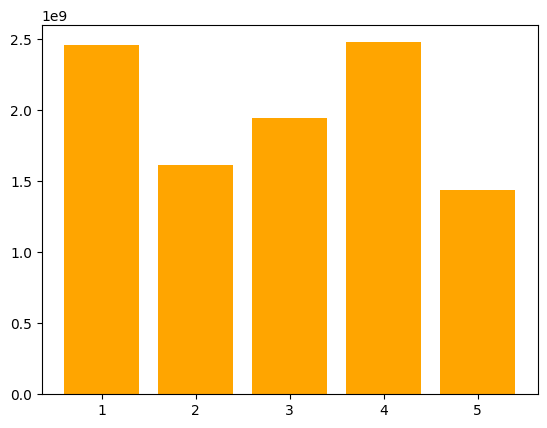

<Figure size 640x480 with 0 Axes>

In [12]:
months = range(1,6)
plt.bar(x=months, height = sale_month['TotalPrice'], color = 'orange')
plt.show()
plt.savefig('sale_month_bar.png')


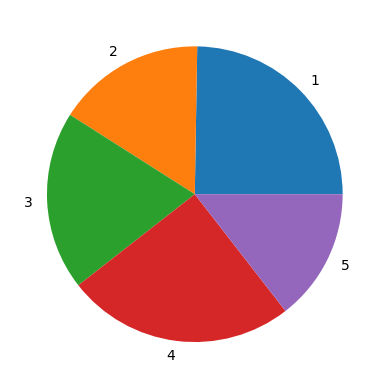

<Figure size 640x480 with 0 Axes>

In [10]:
plt.pie(sale_month['TotalPrice'], labels = months)
plt.show()
plt.savefig('D:\\3rd-year\\DataMining\\Customer-Behavior\\frontend\\src\\assets\\sale_month_pie.png')


In [7]:
# So sánh tháng 1 của năm 2023 với tháng 1 của năm 2024
# Đọc file tháng 1 năm 2024
def readFile(pathFile):
    sheet_index = 1
    df = pd.read_excel(pathFile, sheet_name=sheet_index, header=2)
    df['Mã đơn hàng'] = df['Mã đơn hàng'].astype(str)
    df['Khuyến mãi / Trả thưởng'].fillna(0, inplace=True)
    df = df.drop(df[(df['Đơn giá'] == 0) | (df['Đơn giá'] == 1000) | (df['Đơn giá'] == 1)].index)
    df = df.iloc[:,:12]
    df = df.dropna()
    return df
df1 = readFile('MỸ-KHỞI-FORM-TONG-KET-CHAO-OHAYO-T1.xlsb')
df1
eng_name = ['OrderID', 'ProductID', 'ProductName', 'Type', 'DeliveryDate', 'SalesAgent', 'CustomerID','CustomerName','QuantityOrder', 'QuantityDelivery','Price', 'TotalPrice']
df1.columns = eng_name
df1['TotalPrice'] = df1['QuantityDelivery'] * df1['Price']
df1


C:\Users\VNC\AppData\Local\Temp\ipykernel_304\852488820.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Khuyến mãi / Trả thưởng'].fillna(0, inplace=True)


,OrderID,ProductID,ProductName,Type,DeliveryDate,SalesAgent,CustomerID,CustomerName,QuantityOrder,QuantityDelivery,Price,TotalPrice
0,2401001832.0,500000760,Hảo Hảo Mì Tôm Chua Cay New 30-Hà Nội,Thùng,31/01/2024,Nguyễn Văn Đức,1-BAG0105C0031,Vân Lan-Thôn Bến Phà-Vth,200.0,200.0,116000.0,23200000.0
1,2401001832.0,500000071-G,Hảo Hảo Tôm Chua Cay (gói),Gói,31/01/2024,Nguyễn Văn Đức,1-BAG0105C0031,Vân Lan-Thôn Bến Phà-Vth,79.0,79.0,3866.0,305414.0
2,2401001831.0,500000071-G,Hảo Hảo Tôm Chua Cay (gói),Gói,31/01/2024,Nguyễn Văn Đức,1-BAG0105C0031,Vân Lan-Thôn Bến Phà-Vth,40.0,40.0,3866.0,154640.0
3,2401001831.0,500000760,Hảo Hảo Mì Tôm Chua Cay New 30-Hà Nội,Thùng,31/01/2024,Nguyễn Văn Đức,1-BAG0105C0031,Vân Lan-Thôn Bến Phà-Vth,102.0,102.0,116000.0,11832000.0
4,2401001830.0,500000590,Hảo Hảo Mì Xào Tôm Xào ChNgọt New 30,Thùng,31/01/2024,Nguyễn Văn Đức,1-BAG0105C0088,Dũng Tuyển-Nghĩa Hưng,10.0,10.0,115000.0,1150000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5762,2401000004.0,500000854,Muối chấm Hảo Hảo Tôm Chua Cay 24 Block,Thùng,02/01/2024,Phạm Văn Thanh,1-BAG0105C0052,Luân Thủy-Lạng Giang,1.0,1.0,338000.0,338000.0
5764,2401000003.0,500000073,Mì Bốn Phương Lẩu Chua Cay 30,Thùng,02/01/2024,Phạm Văn Thanh,1-BAG0105C0068,ST Quang Minh-Lạng Giang,3.0,3.0,90000.0,270000.0
5765,2401000003.0,500000854,Muối chấm Hảo Hảo Tôm Chua Cay 24 Block,Thùng,02/01/2024,Phạm Văn Thanh,1-BAG0105C0068,ST Quang Minh-Lạng Giang,1.0,1.0,338000.0,338000.0
5766,2401000002.0,500000854,Muối chấm Hảo Hảo Tôm Chua Cay 24 Block,Thùng,02/01/2024,Phạm Văn Thanh,1-BAG0105C0172,Tuyết-Chợ Vôi,2.0,2.0,315000.0,630000.0


In [8]:
df1['Month'] = df1['DeliveryDate'].str.slice(start=3, stop=5, step=1)
df1


,OrderID,ProductID,ProductName,Type,DeliveryDate,SalesAgent,CustomerID,CustomerName,QuantityOrder,QuantityDelivery,Price,TotalPrice,Month
0,2401001832.0,500000760,Hảo Hảo Mì Tôm Chua Cay New 30-Hà Nội,Thùng,31/01/2024,Nguyễn Văn Đức,1-BAG0105C0031,Vân Lan-Thôn Bến Phà-Vth,200.0,200.0,116000.0,23200000.0,01
1,2401001832.0,500000071-G,Hảo Hảo Tôm Chua Cay (gói),Gói,31/01/2024,Nguyễn Văn Đức,1-BAG0105C0031,Vân Lan-Thôn Bến Phà-Vth,79.0,79.0,3866.0,305414.0,01
2,2401001831.0,500000071-G,Hảo Hảo Tôm Chua Cay (gói),Gói,31/01/2024,Nguyễn Văn Đức,1-BAG0105C0031,Vân Lan-Thôn Bến Phà-Vth,40.0,40.0,3866.0,154640.0,01
3,2401001831.0,500000760,Hảo Hảo Mì Tôm Chua Cay New 30-Hà Nội,Thùng,31/01/2024,Nguyễn Văn Đức,1-BAG0105C0031,Vân Lan-Thôn Bến Phà-Vth,102.0,102.0,116000.0,11832000.0,01
4,2401001830.0,500000590,Hảo Hảo Mì Xào Tôm Xào ChNgọt New 30,Thùng,31/01/2024,Nguyễn Văn Đức,1-BAG0105C0088,Dũng Tuyển-Nghĩa Hưng,10.0,10.0,115000.0,1150000.0,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5762,2401000004.0,500000854,Muối chấm Hảo Hảo Tôm Chua Cay 24 Block,Thùng,02/01/2024,Phạm Văn Thanh,1-BAG0105C0052,Luân Thủy-Lạng Giang,1.0,1.0,338000.0,338000.0,01
5764,2401000003.0,500000073,Mì Bốn Phương Lẩu Chua Cay 30,Thùng,02/01/2024,Phạm Văn Thanh,1-BAG0105C0068,ST Quang Minh-Lạng Giang,3.0,3.0,90000.0,270000.0,01
5765,2401000003.0,500000854,Muối chấm Hảo Hảo Tôm Chua Cay 24 Block,Thùng,02/01/2024,Phạm Văn Thanh,1-BAG0105C0068,ST Quang Minh-Lạng Giang,1.0,1.0,338000.0,338000.0,01
5766,2401000002.0,500000854,Muối chấm Hảo Hảo Tôm Chua Cay 24 Block,Thùng,02/01/2024,Phạm Văn Thanh,1-BAG0105C0172,Tuyết-Chợ Vôi,2.0,2.0,315000.0,630000.0,01


In [10]:
print(set(df1['Month']))


{'01'}


In [19]:
sale_month_1_2024 = df1.groupby('Month')[['TotalPrice', 'QuantityOrder']].sum()
month1_2023 = df[df['Month'] == '01']
sale_month_1_2023 = month1_2023.groupby('Month')[['TotalPrice', 'QuantityOrder']].sum()
sale_month_1_2023


,TotalPrice,QuantityOrder
Month,,
01,2.454950e+09,19040.0


In [20]:
sale_month_1_2024


,TotalPrice,QuantityOrder
Month,,
01,4.022268e+09,39090.0


In [40]:
month = ['01/2023', '01/2024']
height = [sale_month_1_2023['TotalPrice'][0], sale_month_1_2024['TotalPrice'][0]]

monthly_revenue = pd.DataFrame(list(zip(month, height)), columns=['Month', 'Height'])

# Chuyển về dạng json
monthly_revenue_json = monthly_revenue.to_json()
print(monthly_revenue_json)


{"Month":{"0":"01\/2023","1":"01\/2024"},"Height":{"0":2454950250.0,"1":4022268177.0}}


C:\Users\VNC\AppData\Local\Temp\ipykernel_304\629302944.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  height = [sale_month_1_2023['TotalPrice'][0], sale_month_1_2024['TotalPrice'][0]]


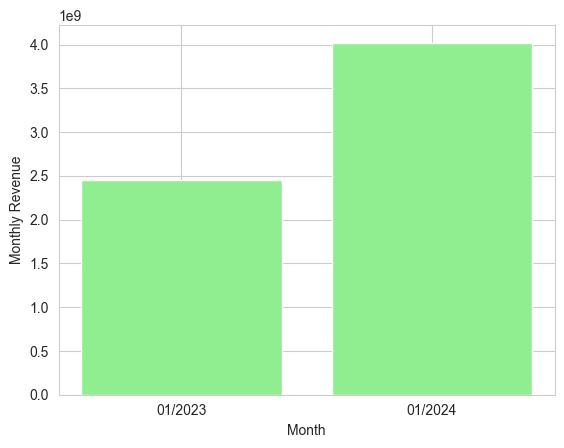

In [43]:
plt.bar(x=month, height=height, color='lightgreen')
plt.xlabel('Month')
plt.ylabel('Monthly Revenue')
plt.show()
plt.savefig('../frontend/src/assets/monthly_revenue.png')


Thống kê theo sản phẩm 

In [5]:
sale_product = df.groupby('ProductName')[['TotalPrice', 'QuantityOrder']].sum()
sale_product_df = pd.DataFrame(sale_product).reset_index()
# Convert the sale_product Series to a dictionary
sale_product_dict = sale_product.to_dict()
# Serialize the dictionary to JSON with non-ASCII characters preserved
json_data = json.dumps(sale_product_dict, ensure_ascii=False)
json_data


'{"TotalPrice": {"Bún Tươi Sấy Khô Hằng Nga 10L": 1158000.0, "Cháo Ăn Liền Ohayo Gà Bí Đỏ 30": 3060000.0, "Cháo Ăn Liền Ohayo Mix 30": 436000.0, "Cháo Ăn Liền Ohayo Thịt Bằm 30": 874000.0, "Hảo Hảo Mì Gà Vàng 30": 13773000.0, "Hảo Hảo Mì Gà vàng 30": 2006000.0, "Hảo Hảo Mì Tôm Chua Cay New 30-Hà Nội": 2751468000.0, "Hảo Hảo Mì Xào Hsản Đậm Vị Việt 30H23": 55137000.0, "Hảo Hảo Mì Xào Tôm Hành 30": 1414000.0, "Hảo Hảo Mì Xào Tôm Xào ChNgọt New 30 ": 39724000.0, "Hảo Hảo Mì Xào Tôm Xào Chua Ngọt New 30": 222365000.0, "Hằng Nga Bún Bò Huế 30": 976000.0, "Hằng Nga Bún Giò Heo 30": 24600000.0, "Hủ Tiếu Nhịp Sống Sườn Heo 30": 2196000.0, "Miến Phú Hương Hvị Sườn Heo 24": 49646000.0, "Miến Phú Hương Sườn Heo 24": 22544000.0, "Miến Phú Hương Sườn Heo 26 xuân 2023": 11280000.0, "Miến Phú Hương Thịt Bằm 24": 5992000.0, "Miến Phú Hương Yến Tiệc": 41316000.0, "Muối Chấm Hảo Hảo Tôm Chua Cay (Block 6)": 32969750.0, "Muối Chấm Hảo Hảo Tôm Chua Cay 24 Block": 679453000.0, "Mì Bốn Phương Lẩu Chua Cay 3

Lấy ra 10 sản phẩm có doanh thu cao nhất

In [50]:
top_10_products = sale_product_df.nlargest(10, 'TotalPrice')
top_10_products
# Chuyển về dạng json
top_10_products_json = json.dumps(top_10_products.to_dict(), ensure_ascii=False)
top_10_products_json


'{"ProductName": {"6": "Hảo Hảo Mì Tôm Chua Cay New 30-Hà Nội", "22": "Mì Good Phở Gà 30", "28": "Mì Hảo Hảo Tôm Chua Cay 30 Hà Nội H23", "29": "Mì Hảo Hảo Tôm Chua Cay New 32 Hà Nội", "20": "Muối Chấm Hảo Hảo Tôm Chua Cay 24 Block", "21": "Mì Bốn Phương Lẩu Chua Cay 30", "34": "Mì Ly Modern Lẩu Thái Tôm 24", "33": "Mì Ly Handy Hảo Hảo Tôm Chua Cay 24", "10": "Hảo Hảo Mì Xào Tôm Xào Chua Ngọt New 30", "45": "Mì Siukay Hải Sản 24"}, "TotalPrice": {"6": 2751468000.0, "22": 2104324000.0, "28": 967589000.0, "29": 843449000.0, "20": 679453000.0, "21": 441713000.0, "34": 385804000.0, "33": 288410000.0, "10": 222365000.0, "45": 156530000.0}, "QuantityOrder": {"6": 23383.0, "22": 17899.0, "28": 8217.0, "29": 7170.0, "20": 2010.0, "21": 4824.0, "34": 2182.0, "33": 1422.0, "10": 1888.0, "45": 572.0}}'

In [11]:
# Top 5 sản phẩm bán chạy
top_5_products = sale_product_df.nlargest(5, 'TotalPrice')
top_5_products_df = pd.DataFrame(top_5_products).reset_index()
a = top_5_products_df['ProductName']
a[1]


'Mì Good Phở Gà 30'

In [14]:
# Biểu đồ thể hiện số lượng bán các sản phẩm top 5 theo 5 tháng
df2 = df.groupby(['Month', 'ProductName'])['QuantityOrder'].sum()
df3 = pd.DataFrame(df2).reset_index()
product2 = df3[df3['ProductName'] == 'Mì Good Phở Gà 30']
product1 = df3[df3['ProductName'] == 'Hảo Hảo Mì Tôm Chua Cay New 30-Hà Nội']
product3 = df3[df3['ProductName'] == 'Mì Hảo Hảo Tôm Chua Cay 30 Hà Nội H23']
product4 = df3[df3['ProductName'] == 'Mì Hảo Hảo Tôm Chua Cay New 32 Hà Nội']
product5 = df3[df3['ProductName'] == 'Muối Chấm Hảo Hảo Tôm Chua Cay 24 Block']
product1


,Month,ProductName,QuantityOrder
3,01,Hảo Hảo Mì Tôm Chua Cay New 30-Hà Nội,3079.0
31,02,Hảo Hảo Mì Tôm Chua Cay New 30-Hà Nội,6567.0
60,03,Hảo Hảo Mì Tôm Chua Cay New 30-Hà Nội,6048.0
89,04,Hảo Hảo Mì Tôm Chua Cay New 30-Hà Nội,7689.0


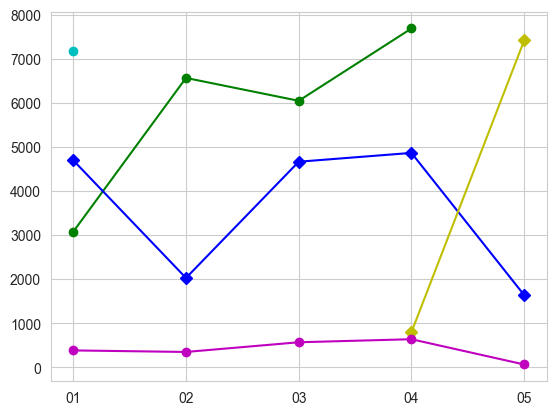

In [36]:
plt.plot(product1['Month'], product1['QuantityOrder'], 'go-')
plt.plot(product2['Month'], product2['QuantityOrder'], 'bD-')
plt.plot(product3['Month'], product3['QuantityOrder'], 'yD-')
plt.plot(product4['Month'], product4['QuantityOrder'], 'co-')
plt.plot(product5['Month'], product5['QuantityOrder'], 'mo-')
plt.show()


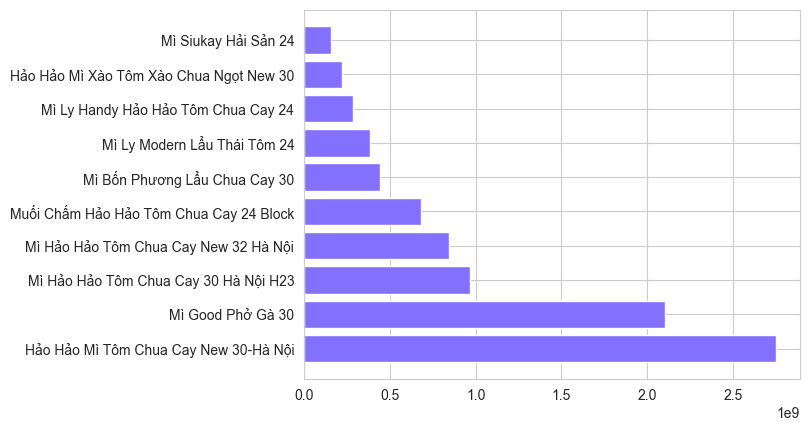

In [55]:
# Top 10 sản phẩm bán chạy
plt.barh(top_10_products['ProductName'], top_10_products['TotalPrice'], color='#8470FF')
plt.show()


In [71]:
top_10_products_of_month = df.groupby(['Month', 'ProductName'])['TotalPrice'].sum()
top_10_products_of_month_df = pd.DataFrame(top_10_products_of_month).reset_index()
# top_10_products_of_month_df = top_10_products_of_month_df[top_10_products_of_month_df['Month'] == '03'].nlargest(10, 'TotalPrice') # Top 10 sản phẩm bán chạy trong tháng 03
top_10_products_of_month_json = json.dumps(top_10_products_of_month_df.to_dict(), ensure_ascii=False)
top_10_products_of_month_json

def product_of_month(month, top_10_products_of_month_df):
    result = top_10_products_of_month_df[top_10_products_of_month_df['Month'] == month].nlargest(10, 'TotalPrice')
    result_json = json.dumps(result.to_dict(), ensure_ascii=False) 
    return result # Trả về json nếu muốn


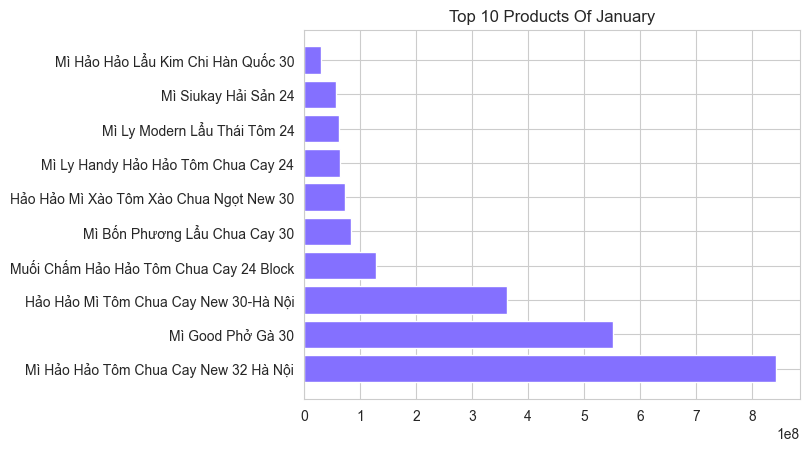

In [74]:
# Vẽ biểu đồ sản phẩm bán chạy theo từng tháng
top_10_products_of_01 = product_of_month('01', top_10_products_of_month_df)
plt.barh(top_10_products_of_01['ProductName'], top_10_products_of_01['TotalPrice'], color='#8470FF')
plt.title("Top 10 Products Of January")
plt.show()


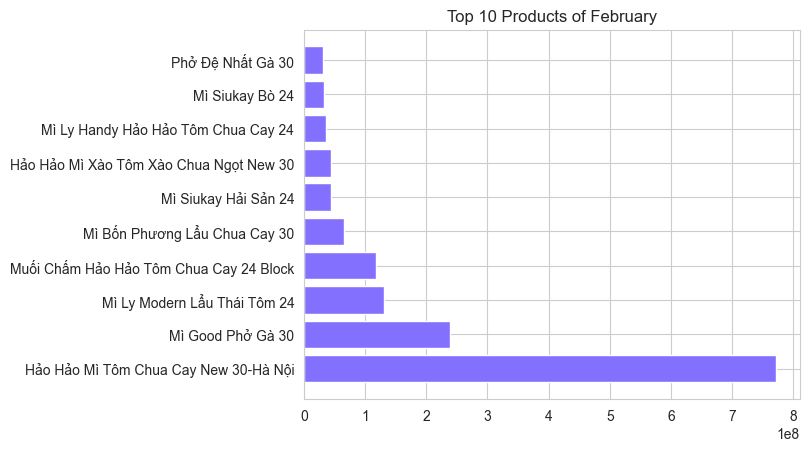

In [75]:
# Vẽ biểu đồ sản phẩm bán chạy theo tháng 2
top_10_products_of_02 = product_of_month('02', top_10_products_of_month_df)
plt.barh(top_10_products_of_02['ProductName'], top_10_products_of_02['TotalPrice'], color='#8470FF')
plt.title("Top 10 Products of February")
plt.show()


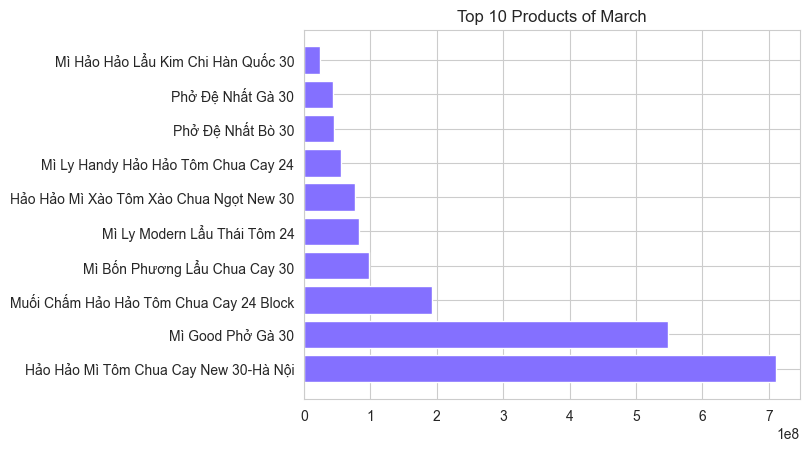

In [76]:
# Vẽ biểu đồ sản phẩm bán chạy theo tháng 3
top_10_products_of_03 = product_of_month('03', top_10_products_of_month_df)
plt.barh(top_10_products_of_03['ProductName'], top_10_products_of_03['TotalPrice'], color='#8470FF')
plt.title("Top 10 Products of March")
plt.show()


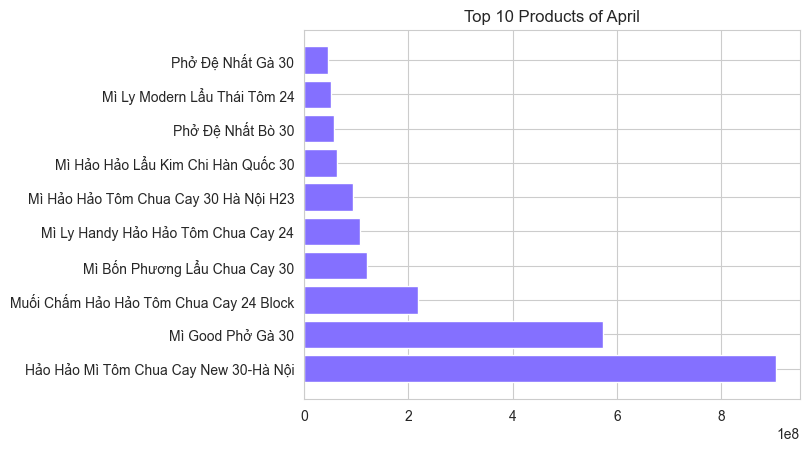

In [77]:
# Vẽ biểu đồ sản phẩm bán chạy theo tháng 4
top_10_products_of_04 = product_of_month('04', top_10_products_of_month_df)
plt.barh(top_10_products_of_04['ProductName'], top_10_products_of_04['TotalPrice'], color='#8470FF')
plt.title("Top 10 Products of April")
plt.show()


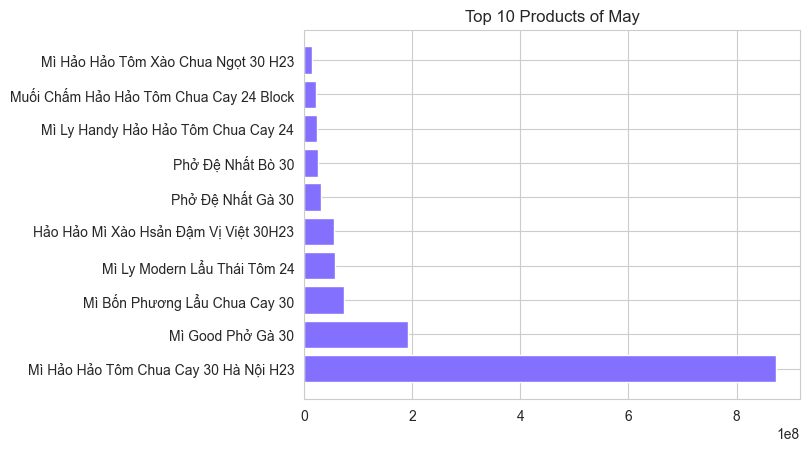

In [78]:
# Vẽ biểu đồ sản phẩm bán chạy theo tháng 5
top_10_products_of_05 = product_of_month('05', top_10_products_of_month_df)
plt.barh(top_10_products_of_05['ProductName'], top_10_products_of_05['TotalPrice'], color='#8470FF')
plt.title("Top 10 Products of May")
plt.show()


In [78]:
sale_product


,TotalPrice,QuantityOrder
ProductName,,
Bún Tươi Sấy Khô Hằng Nga 10L,1.158000e+06,6.0
Cháo Ăn Liền Ohayo Gà Bí Đỏ 30,3.060000e+06,14.0
Cháo Ăn Liền Ohayo Mix 30,4.360000e+05,2.0
Cháo Ăn Liền Ohayo Thịt Bằm 30,8.740000e+05,4.0
Hảo Hảo Mì Gà Vàng 30,1.377300e+07,117.0
Hảo Hảo Mì Gà vàng 30,2.006000e+06,17.0
Hảo Hảo Mì Tôm Chua Cay New 30-Hà Nội,2.751468e+09,23383.0
Hảo Hảo Mì Xào Hsản Đậm Vị Việt 30H23,5.513700e+07,468.0
Hảo Hảo Mì Xào Tôm Hành 30,1.414000e+06,12.0


Thống kê theo khách hàng

In [5]:
# Khách hàng mua nhiều nhất
df1 = df.groupby('CustomerName')[['TotalPrice', 'QuantityOrder']].sum()
sorted_df = df1.sort_values('TotalPrice', ascending=False)
sale_customer_df = pd.DataFrame(sorted_df).reset_index()
df1


,TotalPrice,QuantityOrder
CustomerName,,
Dũng Luyến-Bến Tuần-K3,88739000.0,730.0
Thường Nhung-Nhà Số 7-Phân Đạm,5656000.0,45.0
Anh Thư-Cầu Chui,15999500.0,110.0
Anh Tâm-Thôn Năm,11436000.0,83.0
Bà Hường-Số 49-Cơ Khí-K4,7620000.0,62.0
...,...,...
Đỗ Hòa-Thôn Bến Phà,5654000.0,42.0
Đỗ Đậu-Trần Nguyên Hãn,15687000.0,112.0
Đức Chương-Tt Kép-K3,6826500.0,44.0


Top 10 khách hàng mua nhiều nhất

In [6]:
top_10_customer = sale_customer_df.nlargest(10, 'TotalPrice')
top_10_customer_json = json.dumps(top_10_customer.to_dict(), ensure_ascii=False)
print(top_10_customer_json)


{"CustomerName": {"0": "Vân Anh-51-Chợ Thương", "1": "Nam Hòa-Yên Dũng", "2": "Bà Mỹ-Chợ Thương", "3": "Hương Ân-Thôn Bến Phà-Vth", "4": "Cúc Quả-Phố Bằng-K3", "5": "ST May-Lạng Giang", "6": "Ngân Quỳnh-Hoàng Hoa Thám", "7": "Hoàng Hảo-Làng Thuyền", "8": "Dũng Tuyển-Nghĩa Hưng", "9": "Nhuệ Suốt-Tt Mỏ Trạng-K3"}, "TotalPrice": {"0": 403660000.0, "1": 246674000.0, "2": 210260500.0, "3": 187072250.0, "4": 166933250.0, "5": 163633000.0, "6": 162944000.0, "7": 158475000.0, "8": 153383250.0, "9": 148027000.0}, "QuantityOrder": {"0": 3348.0, "1": 2088.0, "2": 1593.0, "3": 1540.0, "4": 1420.0, "5": 1283.0, "6": 1330.0, "7": 1346.0, "8": 1334.0, "9": 1126.0}}


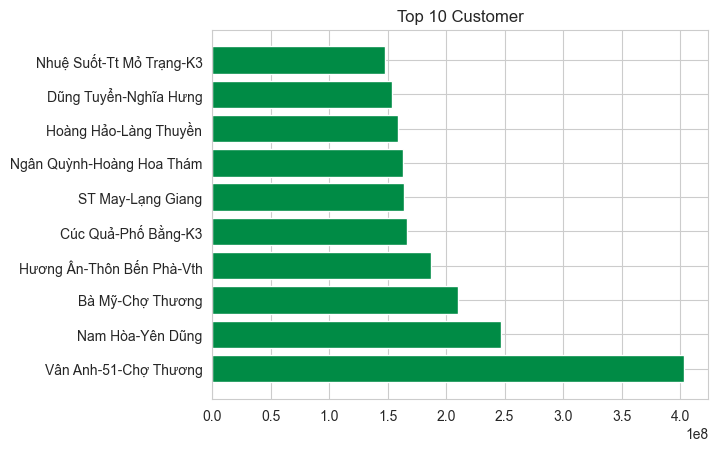

In [11]:
# Vẽ biểu đồ
plt.barh(top_10_customer['CustomerName'], top_10_customer['TotalPrice'], color='#008B45')
plt.title("Top 10 Customer")
plt.show()


In [8]:
# Top 10 khách hàng mua ít nhất
last_10_customer = sale_customer_df.nsmallest(10, 'TotalPrice')
last_10_customer_json = json.dumps(last_10_customer.to_dict(), ensure_ascii=False)
last_10_customer_json


'{"CustomerName": {"491": "Em Hiền-Chợ Vôi", "492": "Thúy Lợi-Chợ Vôi", "488": "Chị Vui-Chợ Hòa Yên", "489": "Chị Sen-Chợ Hòa Yên", "490": "Chị Lan-Chợ Hòa Yên", "487": "Cường Hải-Tt Mỏ Trạng", "486": "Bình Mai-Dĩnh Trì", "485": "Minh Tâm-Trần Đăng Tuyển", "484": "Hoa Thiện-Hoàng Hoa Thám", "483": "Đoàn Phương-Lê Lợi"}, "TotalPrice": {"491": 344000.0, "492": 344000.0, "488": 688000.0, "489": 688000.0, "490": 688000.0, "487": 1298000.0, "486": 1534000.0, "485": 2086000.0, "484": 2180000.0, "483": 2409000.0}, "QuantityOrder": {"491": 4.0, "492": 4.0, "488": 2.0, "489": 2.0, "490": 2.0, "487": 11.0, "486": 13.0, "485": 17.0, "484": 17.0, "483": 18.0}}'

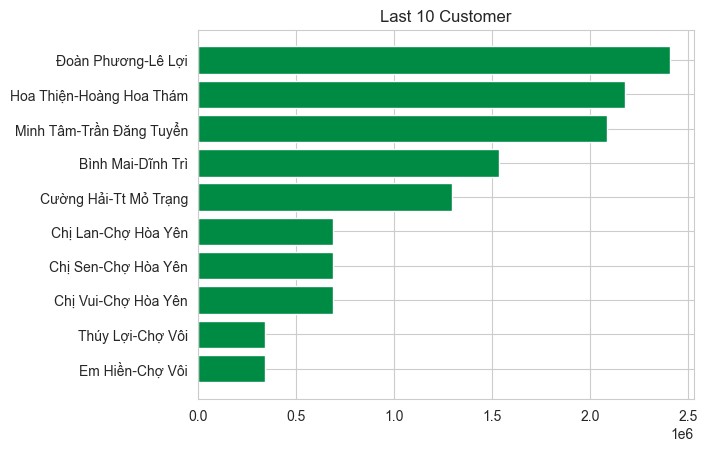

In [10]:
# Vẽ biểu đồ
plt.barh(last_10_customer['CustomerName'], last_10_customer['TotalPrice'], color='#008B45')
plt.title("Last 10 Customer")
plt.show()


In [81]:
sorted_df


,TotalPrice,QuantityOrder
CustomerName,,
Vân Anh-51-Chợ Thương,403660000.0,3348.0
Nam Hòa-Yên Dũng,246674000.0,2088.0
Bà Mỹ-Chợ Thương,210260500.0,1593.0
Hương Ân-Thôn Bến Phà-Vth,187072250.0,1540.0
Cúc Quả-Phố Bằng-K3,166933250.0,1420.0
...,...,...
Chị Vui-Chợ Hòa Yên,688000.0,2.0
Chị Sen-Chợ Hòa Yên,688000.0,2.0
Chị Lan-Chợ Hòa Yên,688000.0,2.0
